נוריד את הדאטהסט ונמיר אותו לקובץ מסוג csv. 

In [8]:
import pandas as pd
import os

# Step 1: Define column names manually (based on dataset documentation)
columns = [
    "ID", "Diagnosis",
    "radius_mean", "texture_mean", "perimeter_mean", "area_mean", "smoothness_mean",
    "compactness_mean", "concavity_mean", "concave_points_mean", "symmetry_mean", "fractal_dimension_mean",
    "radius_se", "texture_se", "perimeter_se", "area_se", "smoothness_se",
    "compactness_se", "concavity_se", "concave_points_se", "symmetry_se", "fractal_dimension_se",
    "radius_worst", "texture_worst", "perimeter_worst", "area_worst", "smoothness_worst",
    "compactness_worst", "concavity_worst", "concave_points_worst", "symmetry_worst", "fractal_dimension_worst"
]

# Step 2: Read the raw data file
df = pd.read_csv("wdbc.data", header=None, names=columns)

# Step 3: Save as clean CSV file
df.to_csv("breast_cancer.csv", index=False)

# Step 4: Confirm that file was saved successfully
if os.path.exists("breast_cancer.csv"):
    print("File successfully saved as breast_cancer.csv")

else:
    print("File save failed.")


File successfully saved as breast_cancer.csv


נקבל מידע כללי על הדאטהסט כדי להבין איך לבחור את שאלת האשכול 


In [9]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       569 non-null    int64  
 1   Diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave_points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

.השתמשנו בצ'אט כדי לקבל מידע במה עוסק הדאטה בייס
📊 Dataset Description: Breast Cancer Wisconsin (Diagnostic)
Source: UCI Machine Learning Repository
Dataset Objective: Classification of breast tumors as malignant or benign based on features extracted from microscopic images of cell nuclei.

Description:
The dataset is based on digitized images of fine needle aspiration (FNA) of breast masses. From each image, 30 numerical features were extracted, representing geometric, textural, and structural properties of the cell nuclei, such as:

Mean radius

Area

Texture

Smoothness

Compactness

Target variable:

Diagnosis: categorical label

M = Malignant

B = Benign

Number of samples: 569
Number of features: 30
Missing values: None

 Step 1: Data Cleaning – Removing the ID column 
כיוון שהיא לא רלוונטית לתוכן הבדיקה- אין לה השפעה על הדיאגנוזה.

In [10]:
df = df.drop(columns=["ID"])

 Step 2: Checking Variable Types and Missing Values

In [12]:
print("Variable types:")
print(df.dtypes.value_counts())

print("\n Missing values:")
print(df.isnull().sum().sort_values(ascending=False).head())



Variable types:
float64    30
object      1
Name: count, dtype: int64

 Missing values:
Diagnosis         0
radius_mean       0
texture_mean      0
perimeter_mean    0
area_mean         0
dtype: int64


 Step 3: Descriptive Statistics + Boxplot

,count,mean,std,min,25%,50%,75%,max
radius_mean,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
texture_mean,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
perimeter_mean,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
area_mean,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
smoothness_mean,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
compactness_mean,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
concavity_mean,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
concave_points_mean,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
symmetry_mean,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
fractal_dimension_mean,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


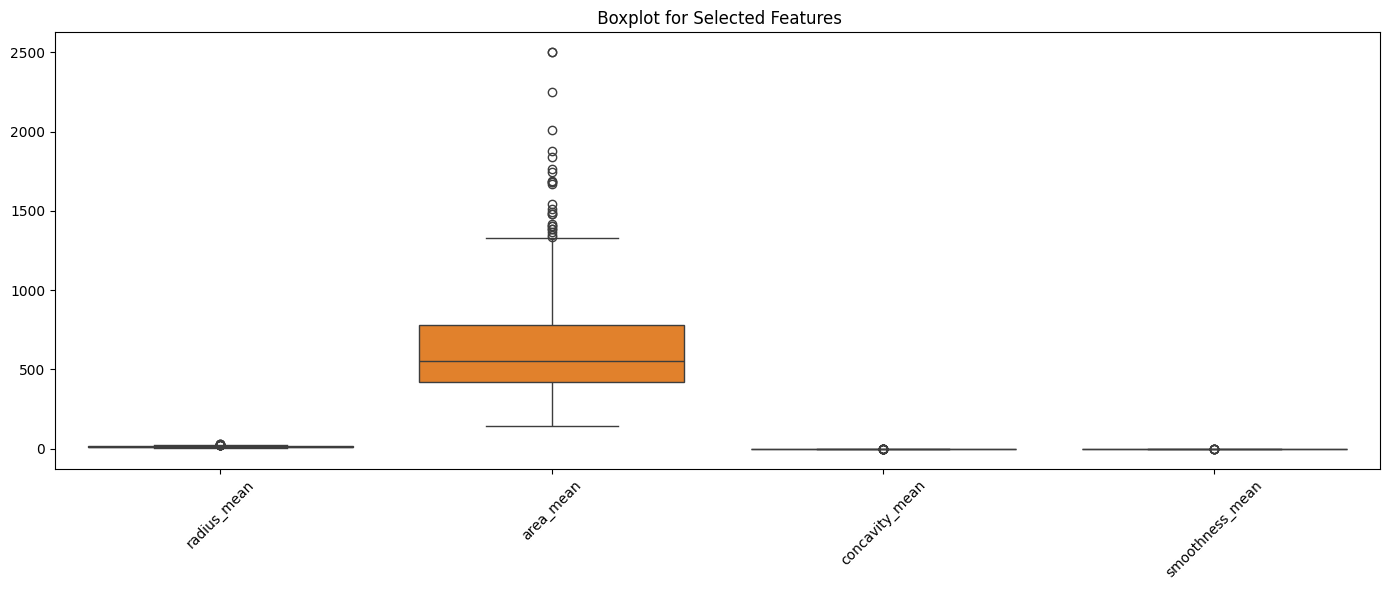

In [15]:
desc_stats = df.describe().T
display(desc_stats)  

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14, 6))
sns.boxplot(data=df[["radius_mean", "area_mean", "concavity_mean", "smoothness_mean"]])
plt.xticks(rotation=45)
plt.title(" Boxplot for Selected Features")
plt.tight_layout()
plt.show()


בגלל שטווח הערכים של שטח הגרעין גדול משמעותית משאר התכונות ניצור גרף לכל אחד בנפרד 


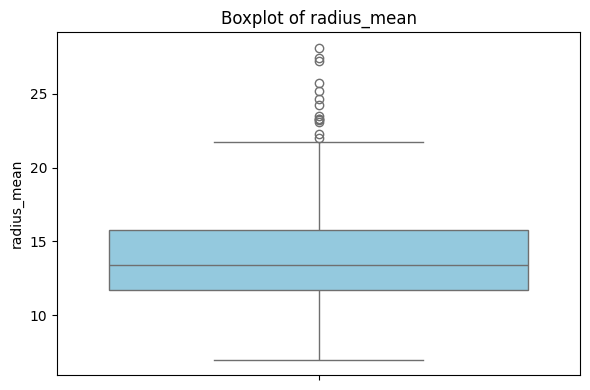

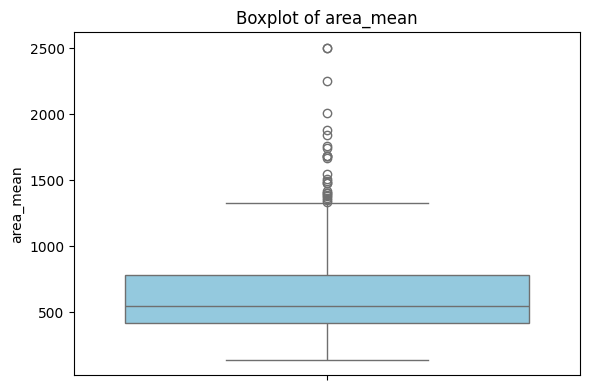

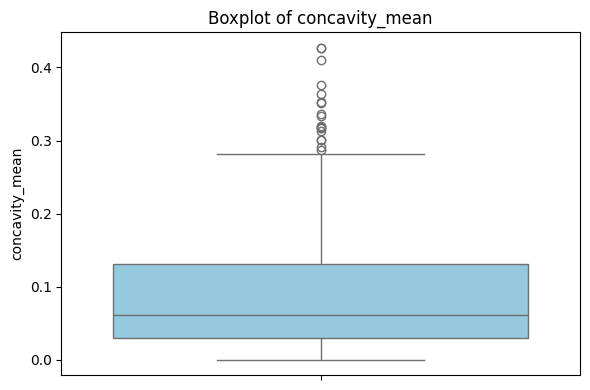

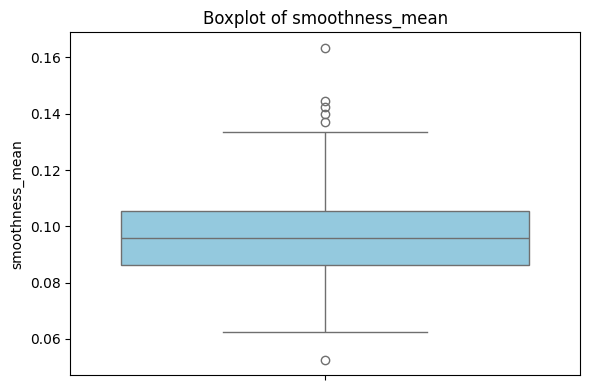

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

features = ["radius_mean", "area_mean", "concavity_mean", "smoothness_mean"]

for feature in features:
    plt.figure(figsize=(6, 4))
    sns.boxplot(y=df[feature], color='skyblue')
    plt.title(f"Boxplot of {feature}")
    plt.tight_layout()
    plt.show()


כעת ניצור היסטוגרמה עבור על אחת מהתכונות הנ"ל 

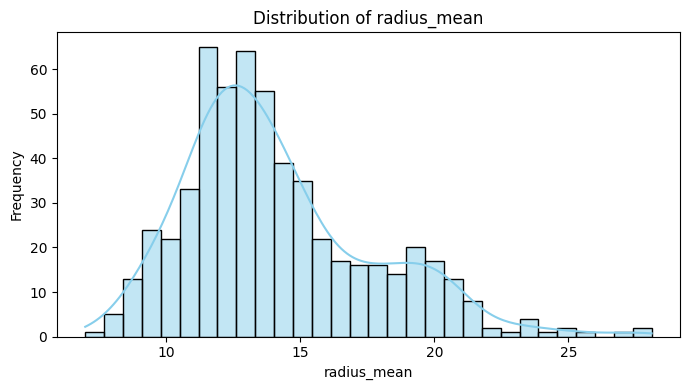

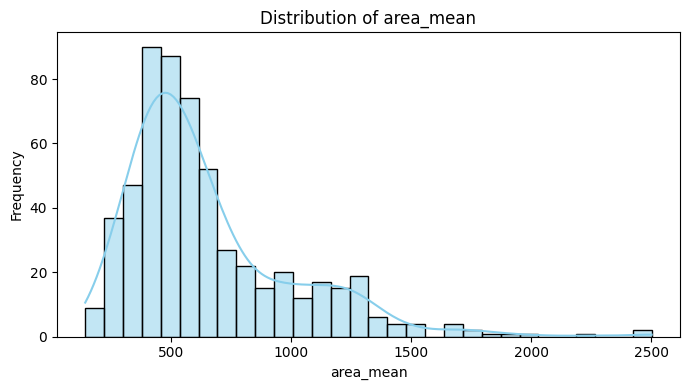

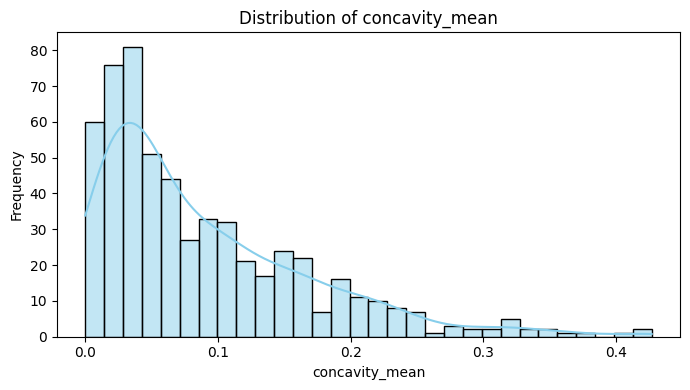

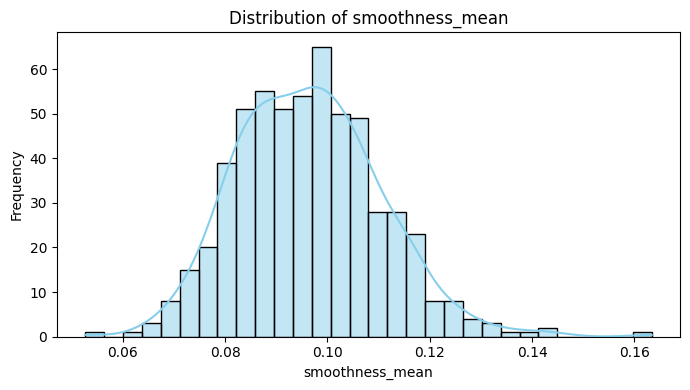

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

features = ["radius_mean", "area_mean", "concavity_mean", "smoothness_mean"]

for feature in features:
    plt.figure(figsize=(7, 4))
    sns.histplot(df[feature], bins=30, kde=True, color='skyblue')
    plt.title(f"Distribution of {feature}")
    plt.xlabel(feature)
    plt.ylabel("Frequency")
    plt.tight_layout()
    plt.show()


יצרנו בהתחלה בוקספלוט והיסטוגרמות רק עבור 4 תכונות, כעת ניצור עבור הכל ואז נחליט מה עדיף? (כי על בסיס מה בחרנו רק 4?)


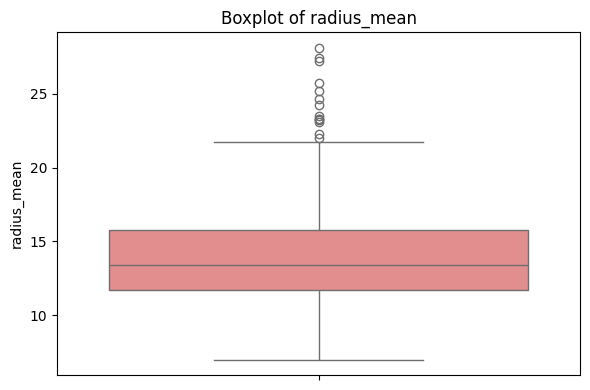

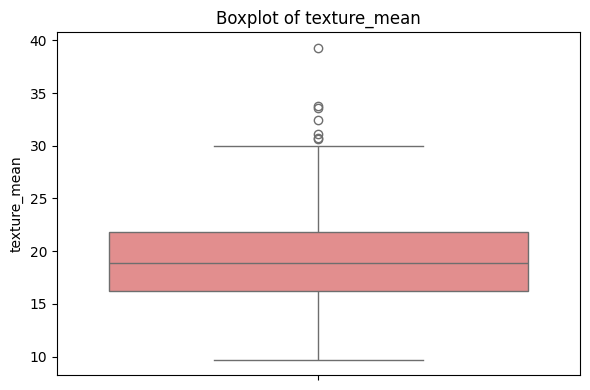

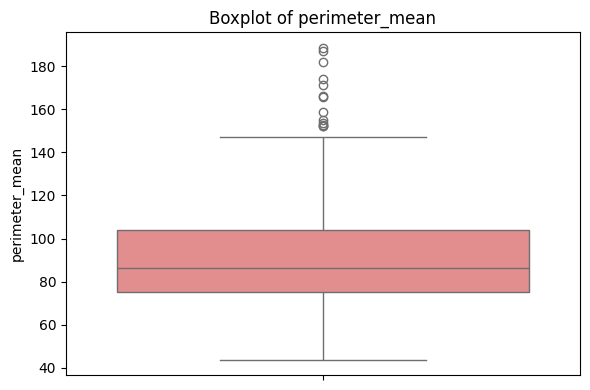

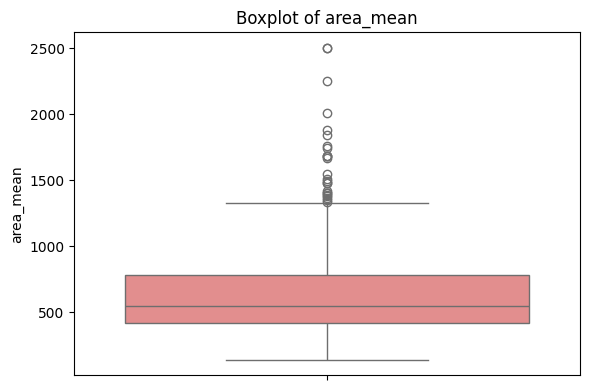

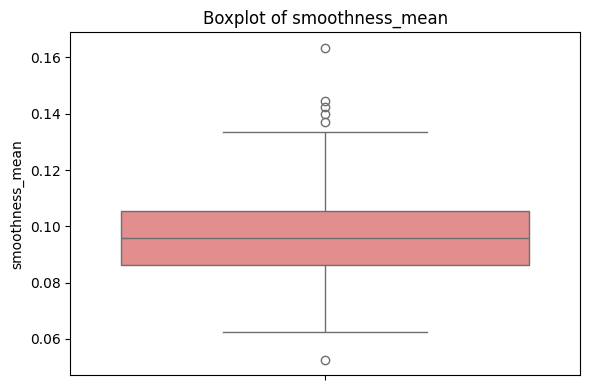

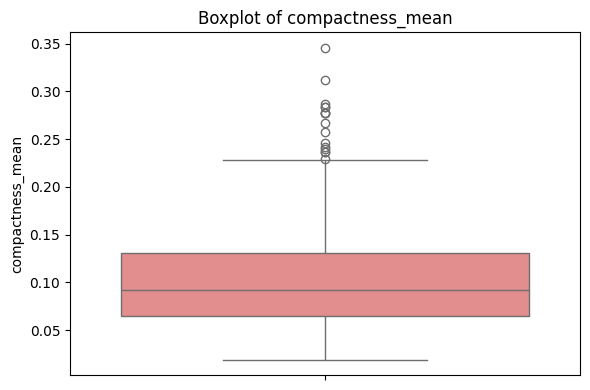

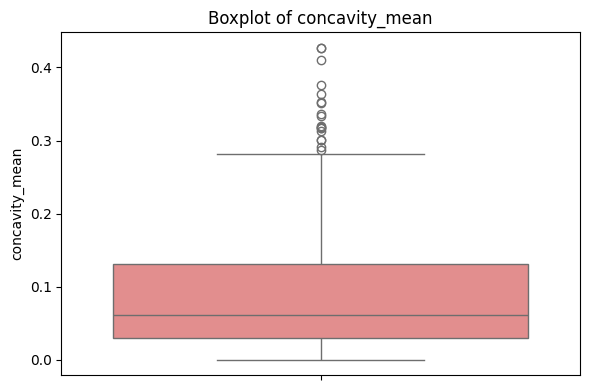

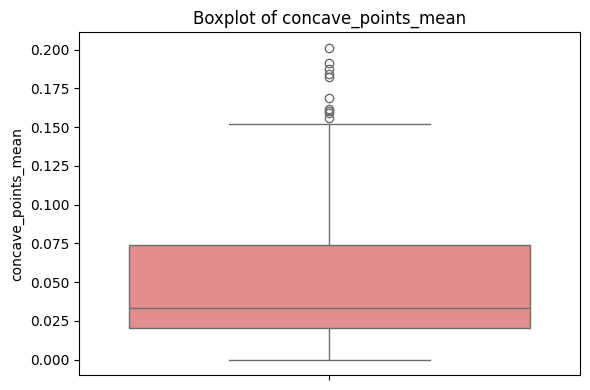

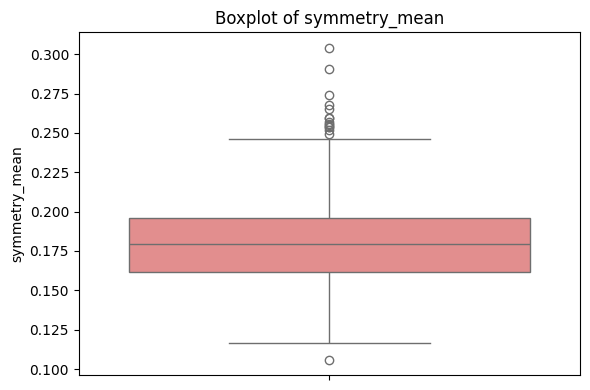

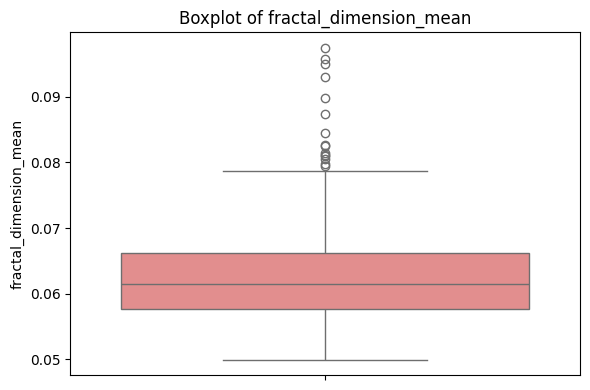

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# 10 mean features
mean_features = [
    'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean',
    'compactness_mean', 'concavity_mean', 'concave_points_mean', 'symmetry_mean', 'fractal_dimension_mean'
]

for feature in mean_features:
    plt.figure(figsize=(6, 4))
    sns.boxplot(y=df[feature], color='lightcoral')
    plt.title(f"Boxplot of {feature}")
    plt.tight_layout()
    plt.show()


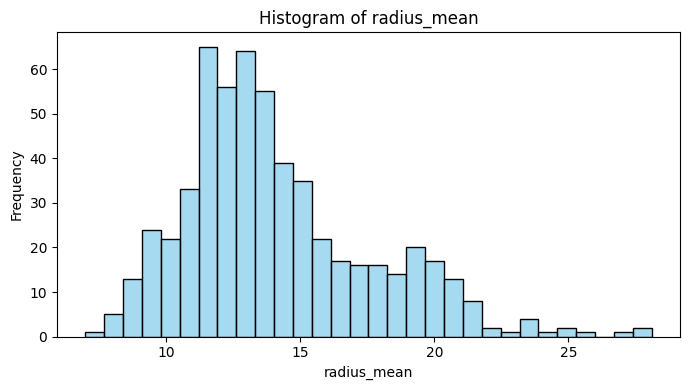

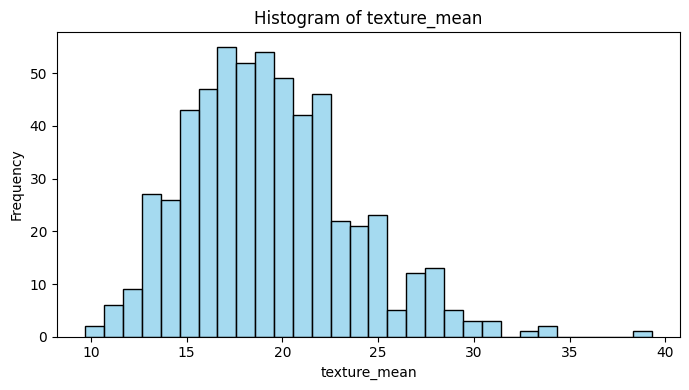

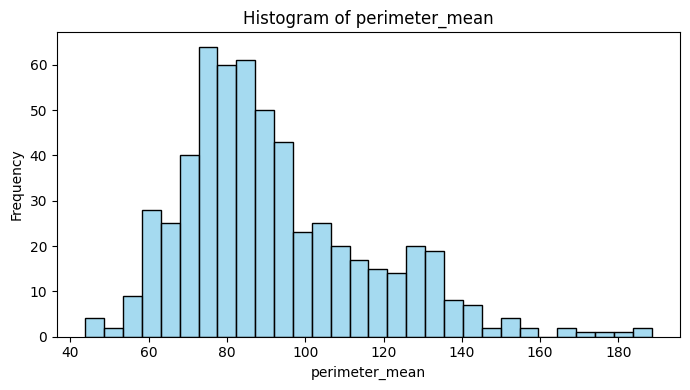

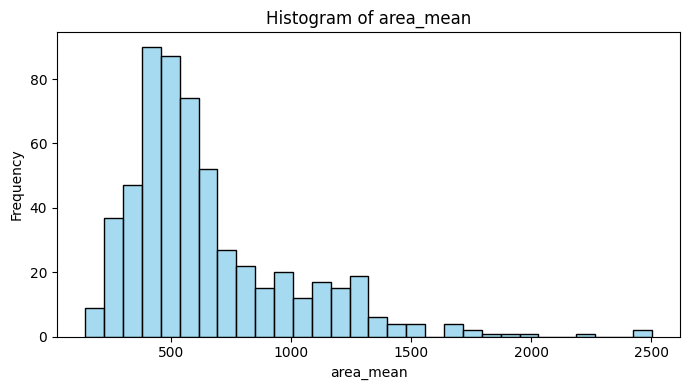

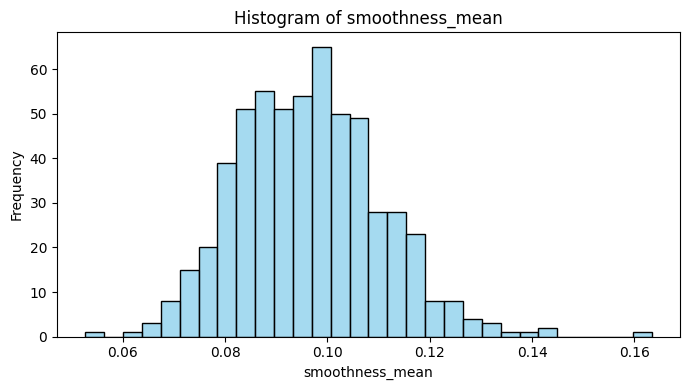

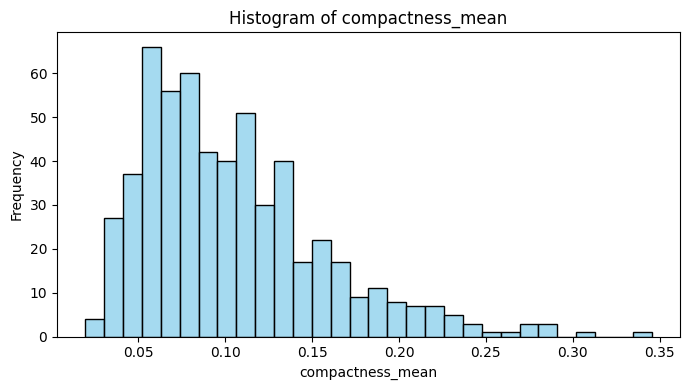

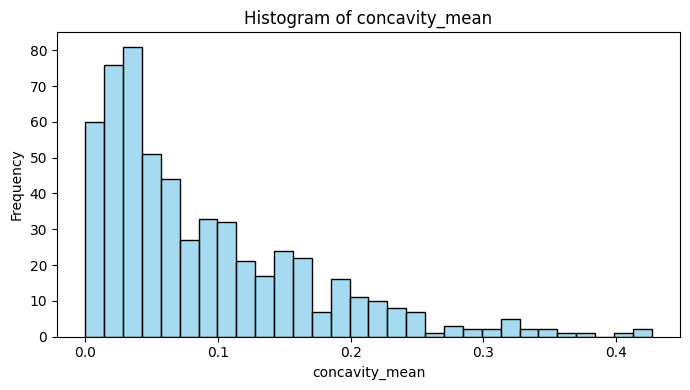

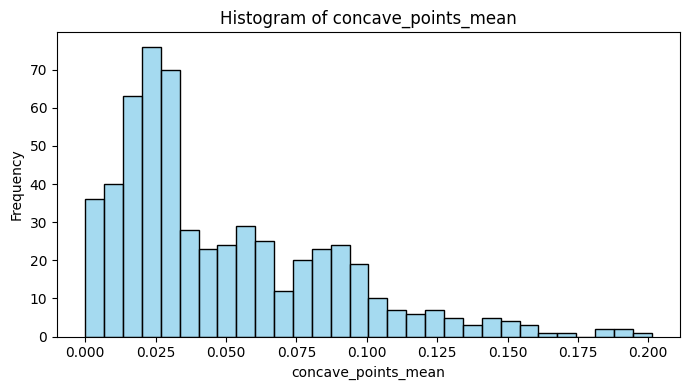

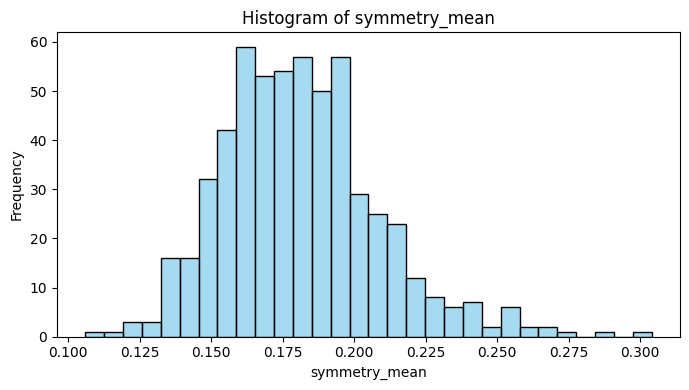

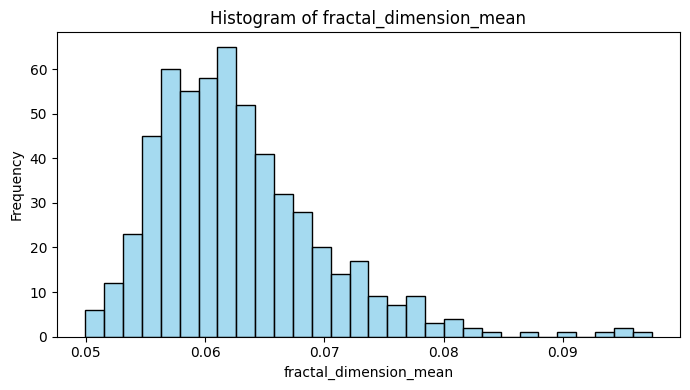

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# 10 mean features
mean_features = [
    'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean',
    'compactness_mean', 'concavity_mean', 'concave_points_mean', 'symmetry_mean', 'fractal_dimension_mean'
]

# ציור היסטוגרמה נפרדת לכל תכונה
for feature in mean_features:
    plt.figure(figsize=(7, 4))
    sns.histplot(df[feature], bins=30, kde=False, color='skyblue')
    plt.title(f"Histogram of {feature}")
    plt.xlabel(feature)
    plt.ylabel("Frequency")
    plt.tight_layout()
    plt.show()


 Step 4: Correlation Matrix Between Features

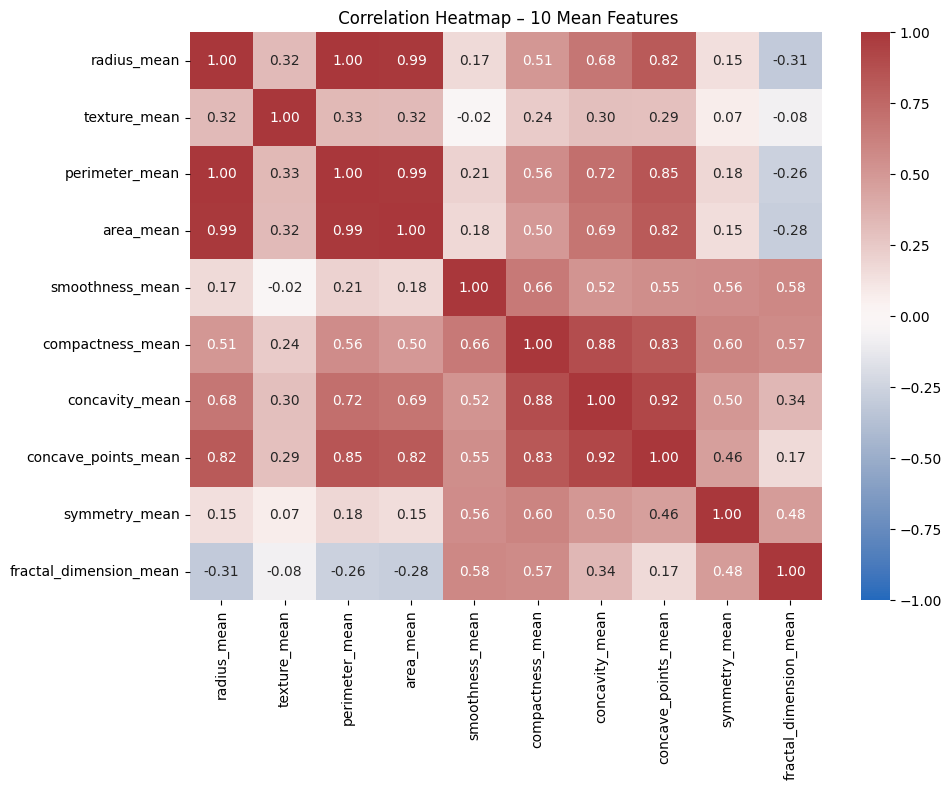

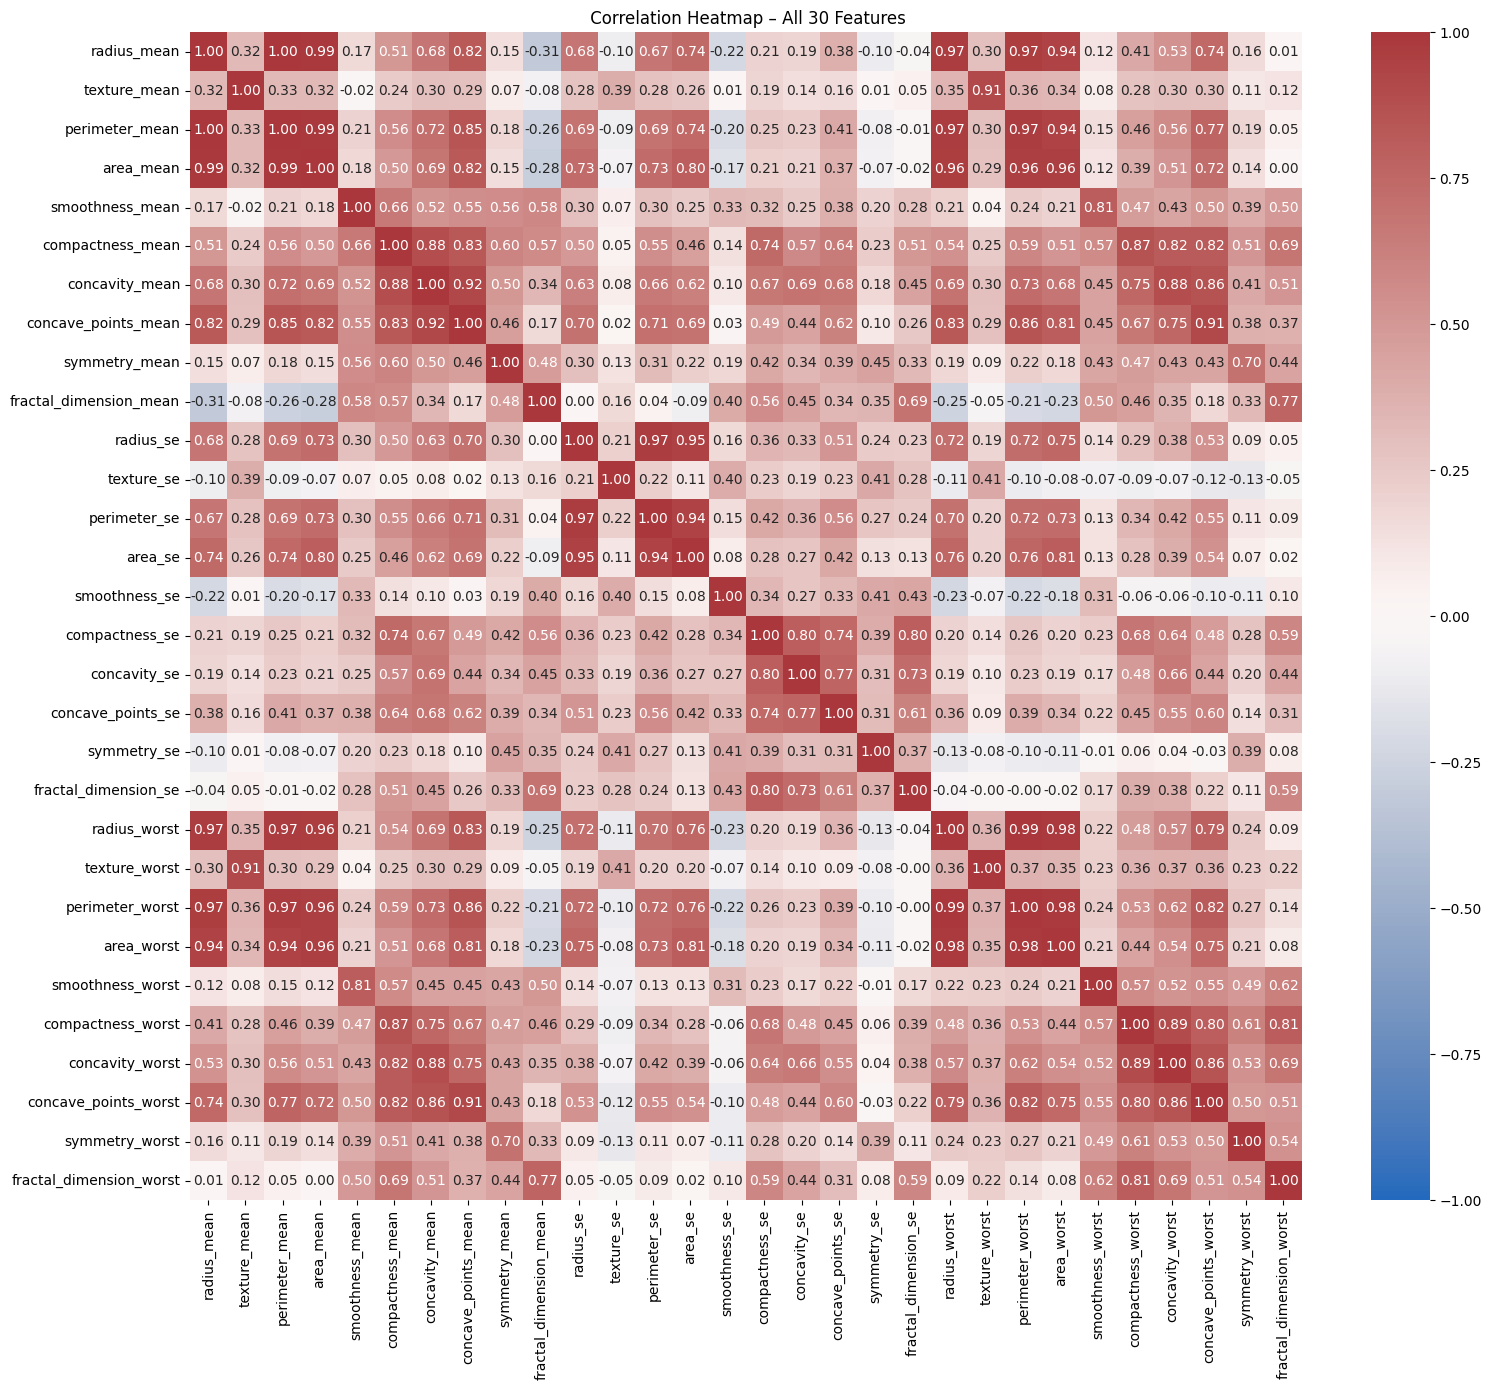

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# ---- 1. Correlation heatmap for 10 mean features ----
mean_features = [
    'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean',
    'compactness_mean', 'concavity_mean', 'concave_points_mean', 'symmetry_mean', 'fractal_dimension_mean'
]

plt.figure(figsize=(10, 8))
sns.heatmap(df[mean_features].corr(), annot=True, fmt=".2f", cmap="vlag", vmin=-1, vmax=1)
plt.title(" Correlation Heatmap – 10 Mean Features")
plt.tight_layout()
plt.show()

# ---- 2. Correlation heatmap for all 30 features ----
numeric_df = df.drop(columns=["Diagnosis"])  # make sure Diagnosis is excluded if it's non-numeric

plt.figure(figsize=(16, 14))
sns.heatmap(numeric_df.corr(), annot=True, fmt=".2f", cmap="vlag", vmin=-1, vmax=1)
plt.title(" Correlation Heatmap – All 30 Features")
plt.tight_layout()
plt.show()


נרצה שהצבעים יהיו יותר בולטים

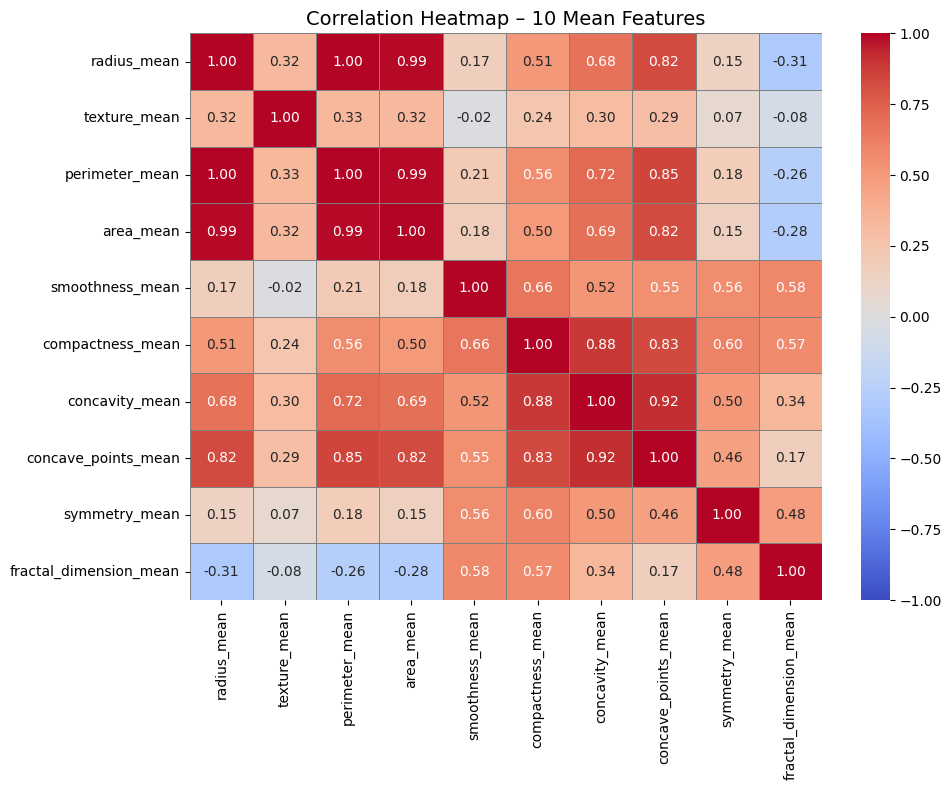

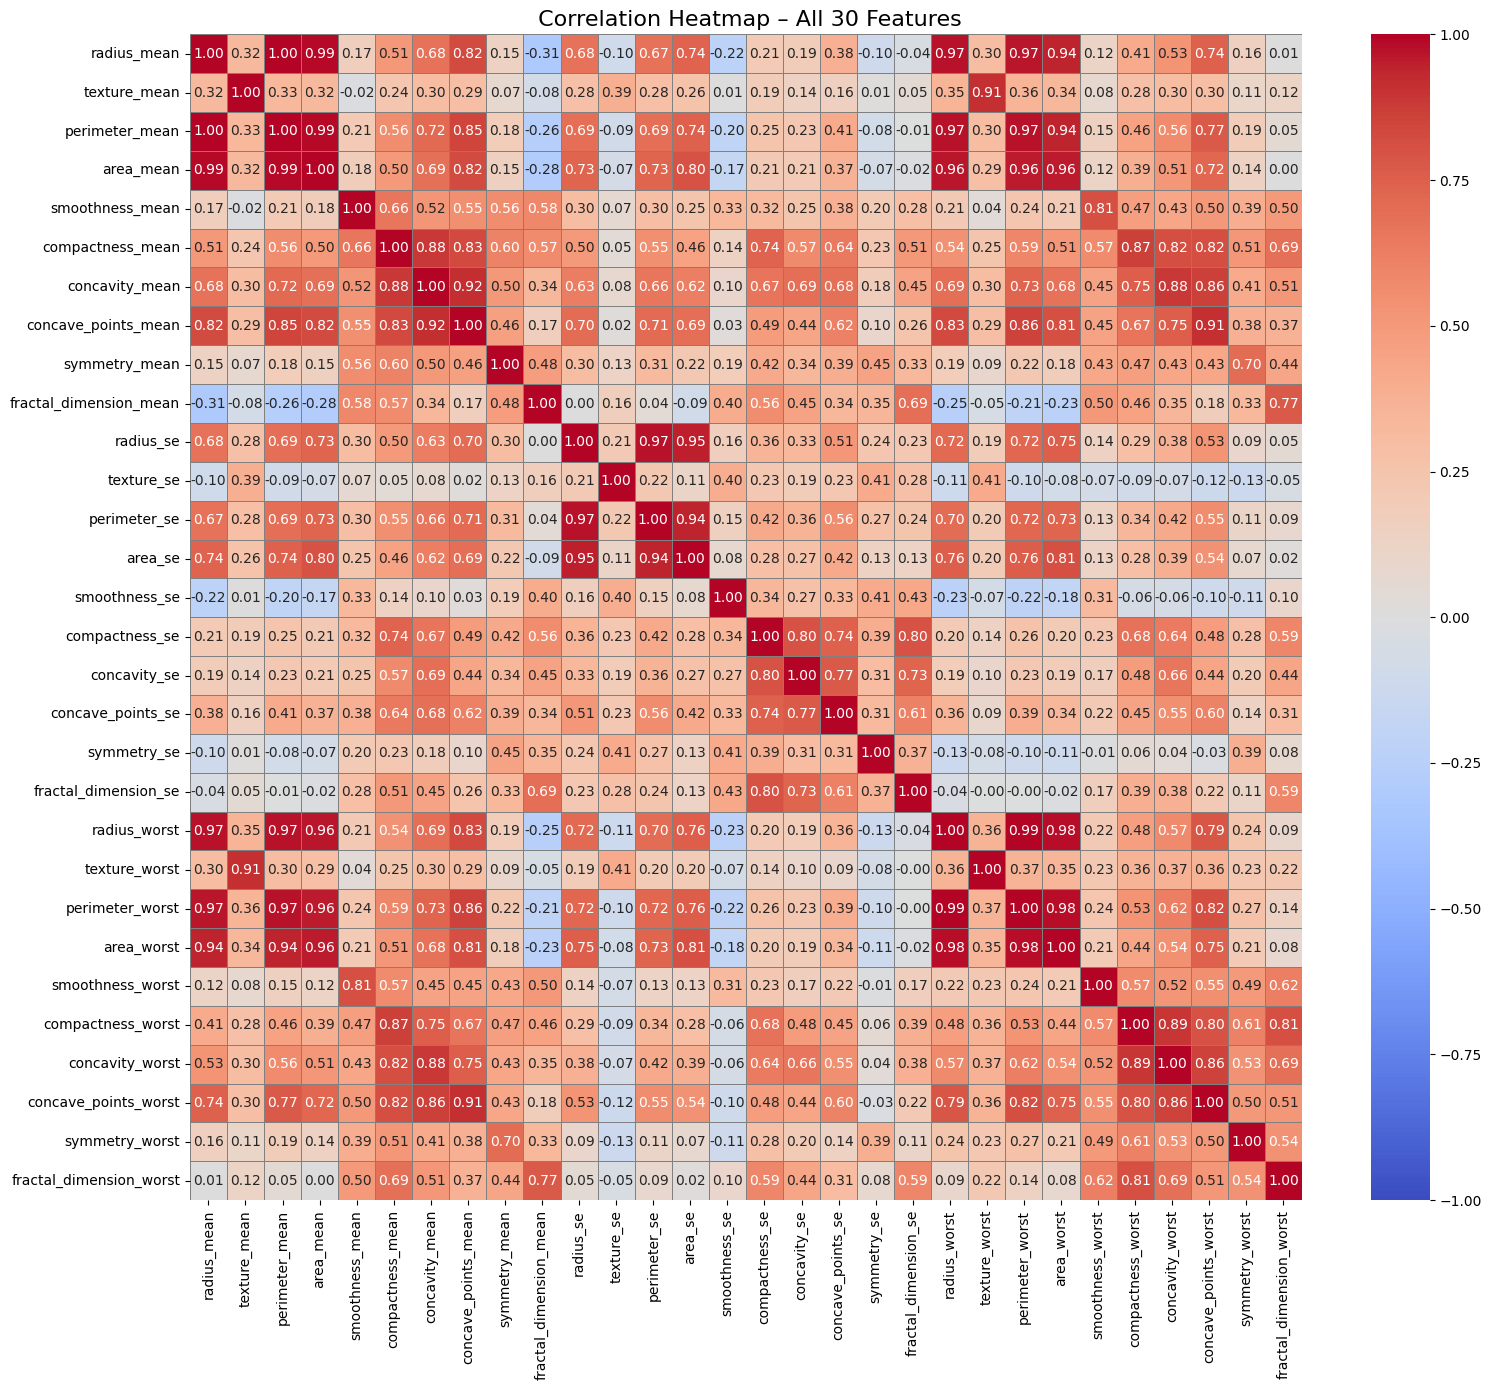

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# --- 1. Heatmap for 10 Mean Features ---
mean_features = [
    'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean',
    'compactness_mean', 'concavity_mean', 'concave_points_mean', 'symmetry_mean', 'fractal_dimension_mean'
]

corr_mean = df[mean_features].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_mean,
            annot=True,
            fmt=".2f",
            cmap="coolwarm",         
            vmin=-1, vmax=1,
            linewidths=0.5,
            linecolor='gray')
plt.title("Correlation Heatmap – 10 Mean Features", fontsize=14)
plt.tight_layout()
plt.show()

# --- 2. Heatmap for All 30 Features ---
numeric_df = df.drop(columns=["Diagnosis"])
corr_all = numeric_df.corr()

plt.figure(figsize=(16, 14))
sns.heatmap(corr_all,
            annot=True,
            fmt=".2f",
            cmap="coolwarm",         
            vmin=-1, vmax=1,
            linewidths=0.5,
            linecolor='gray')
plt.title(" Correlation Heatmap – All 30 Features", fontsize=16)
plt.tight_layout()
plt.show()

    


 Step 5: Scaling (Standardization)
נרצה לבצע נורמליזציה כדי שהאלגוריתם יהיה רלוונטי עבור כלל הערכים. לדוג' area mean  הערכים שלו מאוד גבוהים ביחס לשאר הערכים ואז אלגוריתמים שמבוססים על מרחק לא ישקפו נכון את המצב. 

In [23]:
from sklearn.preprocessing import StandardScaler

X = df.drop(columns=["Diagnosis"])  # רק הפיצ'רים
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


כעת נפעיל אלגוריתם K MEANS וPCA כדי לראות האם אנו מצליחים ליצור 2 קבוצות נפרדות רק בעזרת הנתונים המתמטיים. 

אנחנו ממפעילים את האלגוריתם רק עבור ערכי הממוצע כדי לקבל התרשמות ראשונית ובכדי לא להתעסק עם 30 מימדים. בהמשך על בסיס התוצאות שנקבל כאן נשקול להוסיף גם את המקרים האחרים.

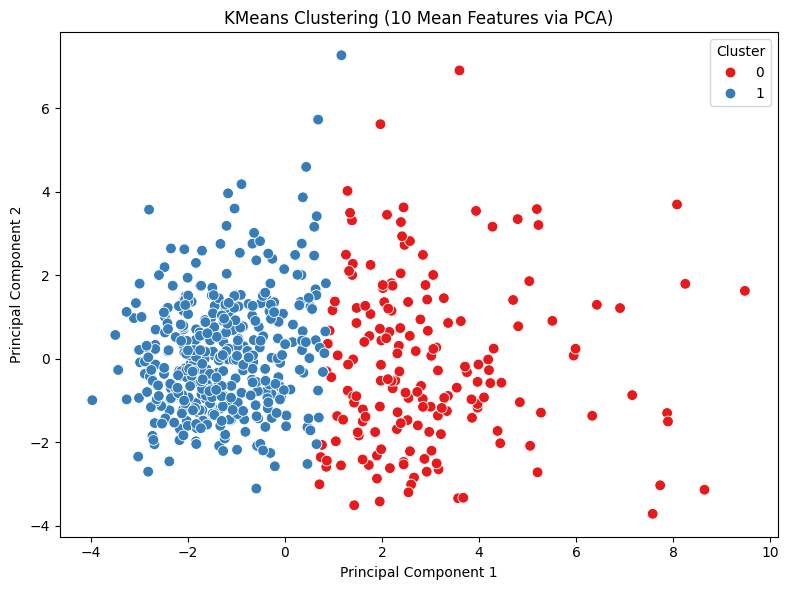

In [25]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Step 1: Define the list of mean features only
mean_features = [
    'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean',
    'compactness_mean', 'concavity_mean', 'concave_points_mean', 'symmetry_mean', 'fractal_dimension_mean'
]

# Step 2: Extract just the mean feature columns from the original DataFrame
X_mean = df[mean_features]
scaler.fit(X_mean)

# Step 3: Apply scaling using the same StandardScaler (assumes scaler already fitted)
X_mean_scaled = scaler.transform(X_mean)

# Step 4: Perform PCA to reduce to 2 dimensions
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_mean_scaled)

# Step 5: Run KMeans with 2 clusters
kmeans = KMeans(n_clusters=2, random_state=42)
labels = kmeans.fit_predict(X_mean_scaled)

# Step 6: Plot the PCA-reduced data with cluster labels
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=labels, palette="Set1", s=60)
plt.title("KMeans Clustering (10 Mean Features via PCA)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title="Cluster")
plt.tight_layout()
plt.show()


ניסינו להפעיל את האלגו רק על 10 ערכים אך כיוון שכבר נרמלנו את כל ה30 קיבלנו שגיאה, לכן ננסה מחדש. 

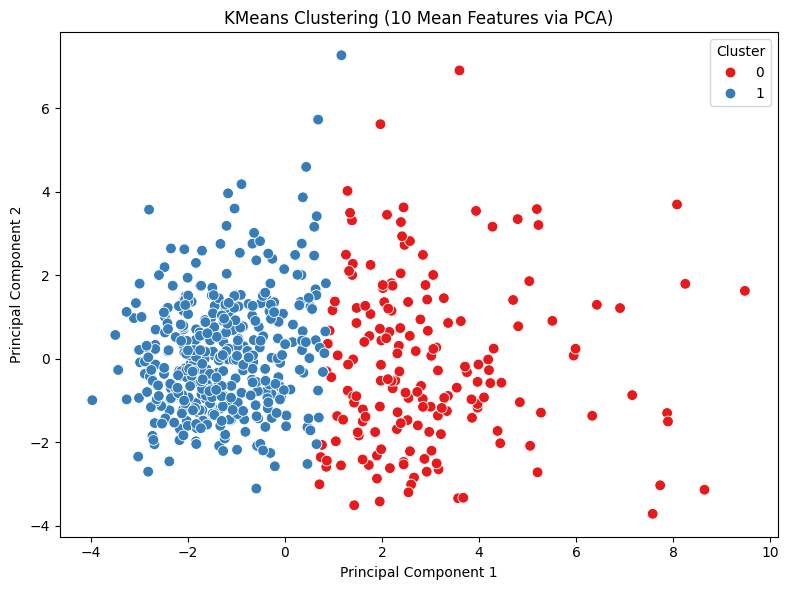

In [26]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Define mean features only
mean_features = [
    'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean',
    'compactness_mean', 'concavity_mean', 'concave_points_mean', 'symmetry_mean', 'fractal_dimension_mean'
]

# Step 2: Extract the mean features
X_mean = df[mean_features]

# Step 3: Apply scaling only to those features using a new scaler
scaler_mean = StandardScaler()
X_mean_scaled = scaler_mean.fit_transform(X_mean)

# Step 4: Apply PCA to reduce to 2 dimensions
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_mean_scaled)

# Step 5: Run KMeans clustering
kmeans = KMeans(n_clusters=2, random_state=42)
labels = kmeans.fit_predict(X_mean_scaled)

# Step 6: Plot PCA result colored by cluster
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=labels, palette="Set1", s=60)
plt.title("KMeans Clustering (10 Mean Features via PCA)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title="Cluster")
plt.tight_layout()
plt.show()


בטעות הפעלנו את PCA לפני K MEANS וזה סדר לא נכון. לכן נהפוך את הסדר כעת ונבדוק מחדש. 

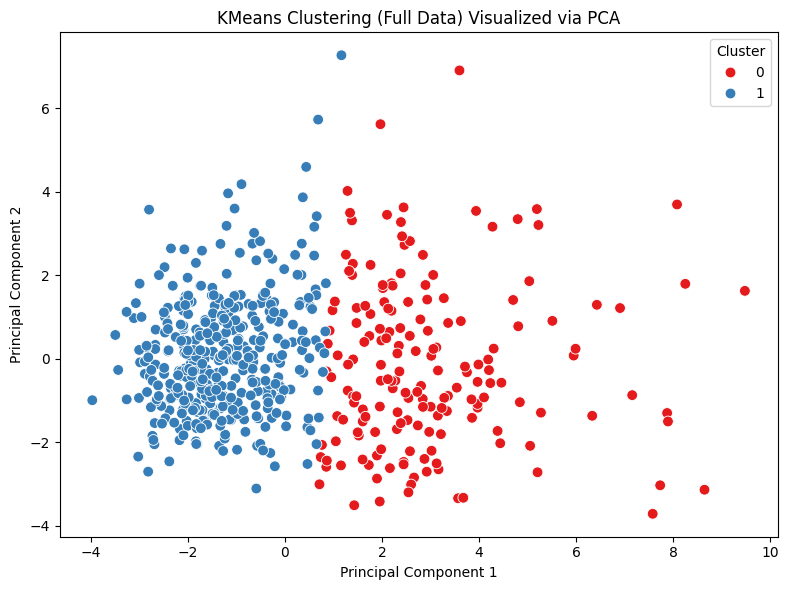

In [27]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Define features (10 mean features only)
mean_features = [
    'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean',
    'compactness_mean', 'concavity_mean', 'concave_points_mean', 'symmetry_mean', 'fractal_dimension_mean'
]

# Step 2: Extract and scale
X_mean = df[mean_features]
scaler = StandardScaler()
X_mean_scaled = scaler.fit_transform(X_mean)

# Step 3: Apply KMeans on full scaled data
kmeans = KMeans(n_clusters=2, random_state=42)
labels = kmeans.fit_predict(X_mean_scaled)

# Step 4: Apply PCA for visualization only
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_mean_scaled)

# Step 5: Plot the PCA-reduced data with cluster labels
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=labels, palette="Set1", s=60)
plt.title("KMeans Clustering (Full Data) Visualized via PCA")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title="Cluster")
plt.tight_layout()
plt.show()


בדיקת שפיות- האם החלוקה שאנו רואים בגרף היא החלוקה גם בין ממאיר לשפיר? נבדוק זאת ע"י ההשוואה בין הנקודות האדומות והכחולות ובין הממאיר והשפיר. נבדוק זאת!

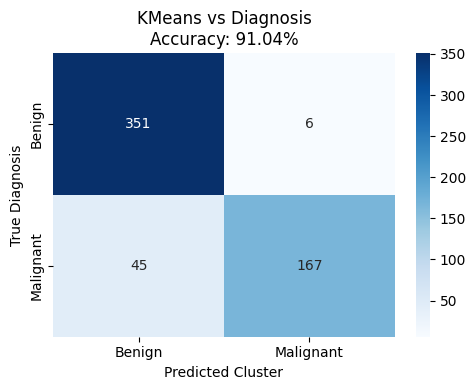

In [28]:
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Convert Diagnosis column to binary values: B = 0 (Benign), M = 1 (Malignant)
true_labels = df["Diagnosis"].map({"B": 0, "M": 1}).values

# KMeans labels are arbitrary (e.g., 0 = Malignant or vice versa), so we align them
if accuracy_score(true_labels, labels) < 0.5:
    labels = 1 - labels  # Flip labels if accuracy is less than 50%

# Calculate accuracy of clustering compared to true diagnosis
accuracy = accuracy_score(true_labels, labels)

# Generate confusion matrix
conf_mat = confusion_matrix(true_labels, labels)

# Plot the confusion matrix
plt.figure(figsize=(5, 4))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap="Blues",
            xticklabels=['Benign', 'Malignant'],
            yticklabels=['Benign', 'Malignant'])
plt.xlabel("Predicted Cluster")
plt.ylabel("True Diagnosis")
plt.title(f"KMeans vs Diagnosis\nAccuracy: {accuracy:.2%}")
plt.tight_layout()
plt.show()


קיבלנו אחוזי דיוק גבוהים מאוד לדעתנו. 

כעת נכתוב את שאלת האשכול: האם ניתן לזהות אשכולות טבעיים של גידולים על בסיס התכונות הפיזיולוגיות בלבד, מבלי לדעת מראש האם הם ממאירים או שפירים — והאם האשכולות האלו חופפים לאבחנה הרפואית?